In [1]:
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
from scipy import io
import scipy.io as sio
%matplotlib inline 
import pylab
import csv
from Tkinter import Tk
from tkFileDialog import askopenfilename
from tkFileDialog import askdirectory
import nibabel as nb
from scipy import io
#from nifti import NiftiImage
import nibabel as nb
from scipy.interpolate import interp1d
from scipy import ndimage

# Open data

In [2]:
# from http://stackoverflow.com/questions/3579568/choosing-a-file-in-python-with-simple-dialog
Tk().withdraw() # we don't want a full GUI, so keep the root window from appearing
filename = askopenfilename() # show an "Open" dialog box and return the path to the selected file
print(filename)

/media/sophie/db554c18-e3eb-41e2-afad-7de1c92bf4a5/ArclightCombo/100031/ss2/100031ss2_1000creg5to36cdFF20sMpsfkf236Smith0_4_60TS.mat


In [3]:
Ua=sio.loadmat(filename)
DT=Ua['TSo']
DT.shape

(11842, 236)

In [4]:
# from http://stackoverflow.com/questions/3579568/choosing-a-file-in-python-with-simple-dialog
Tk().withdraw() # we don't want a full GUI, so keep the root window from appearing
filename2 = askopenfilename() # show an "Open" dialog box and return the path to the selected file
print(filename2)

/media/sophie/db554c18-e3eb-41e2-afad-7de1c92bf4a5/ArclightCombo/100031/ss2/100031ss2_1000creg5to36cdFF20sMpsfkf236Smith0_4_60IC.nii


In [5]:
img1 = nb.load(filename2)
data = img1.get_data()
S=data.shape
S

(171, 95, 9, 236)

In [6]:
S=data.shape
S

(171, 95, 9, 236)

Z-score

In [7]:
Demean=np.zeros(S)
Dmaps=np.zeros(S)
Dvar=np.zeros(S)
Var=np.zeros(S[3])
D2=np.zeros([S[0],S[1],5,S[3]])
Tvar=np.zeros(S[3])

In [8]:
for i in range(S[3]):
    Demean[:,:,:,i]=data[:,:,:,i]-np.mean(np.mean(np.mean(data[:,:,:,i],0),0),0)

In [9]:
for i in range(S[3]):
    Dsq=np.reshape(Demean[:,:,:,i],S[0]*S[1]*S[2])
    Var[i]=np.sqrt(np.var(Dsq))
    Dvar=Demean[:,:,:,i]/Var[i]
    Dmaps[:,:,:,i]=Dvar-2.5
    Tvar[i]=np.var(DT[i,:])
Dmaps[Dmaps<0]=0

# Open Masks

In [16]:
# from http://stackoverflow.com/questions/3579568/choosing-a-file-in-python-with-simple-dialog
from Tkinter import Tk
from tkFileDialog import askopenfilename

Tk().withdraw() # we don't want a full GUI, so keep the root window from appearing
filenameM = askopenfilename() # show an "Open" dialog box and return the path to the selected file
print(filenameM)
img1 = nb.load(filenameM)-Copy1
Masks = img1.get_data()
Sm=Masks.shape
Masks=np.array(Masks)

/media/sophie/db554c18-e3eb-41e2-afad-7de1c92bf4a5/ArclightCombo/100031/ss2/100031registration/JFRC100031Transformedfullpsftrimmed.nii


In [17]:
filenameM='/home/sophie/RegionList'
with open(filenameM) as f:
    content = f.readlines()
Names=[Line.split('\t') for Line in content]
RegionName=[Names[i][0] for i in range(75)]
Num=[int(Names[i][2]) for i in range(75)]

# Average in masks to sort components by brain region

In [18]:
Dmaps.shape

(171, 95, 9, 236)

In [19]:
M=np.zeros((S[3],86))
Mapmean=np.zeros(S[3])
MMasks=np.zeros(86)

In [20]:
for i in range(S[3]):
    Mapmean[i]=np.mean(np.mean(np.mean(Dmaps[:,:,:,i])))
    for j in range(86):
        MMasks[j]=np.mean(np.mean(np.mean(Masks[:,:,:,j])))
        if MMasks[j]:
            M[i,j]=np.mean(np.mean(np.mean(Masks[:,:,:,j]*Dmaps[:,:,:,i])))/(MMasks[j]*Mapmean[i])

In [21]:
CompMainName=S[3]*['']
CompNameAdd=np.zeros((S[3],86))
for i in range(S[3]):
    Max=np.max(M[i,:])
    I=np.argmax(M[i,:])+1
    for j in range(86):
        J=[l for l in range(74) if Num[l]==(j+1)]
        if M[i,j]>0.2*Max:
            CompNameAdd[i,J]=1
    J=[l for l in range(74) if Num[l]==I]
    if J!= []:
        CompMainName[i]=Names[np.array(J)][0]

/usr/local/lib/python2.7/dist-packages/ipykernel/__main__.py:12: VisibleDeprecationWarning: converting an array with ndim > 0 to an index will result in an error in the future


In [22]:
J

[67]

LO_R
LOP_R
2
LO_R
37
LO_R
59
lobula


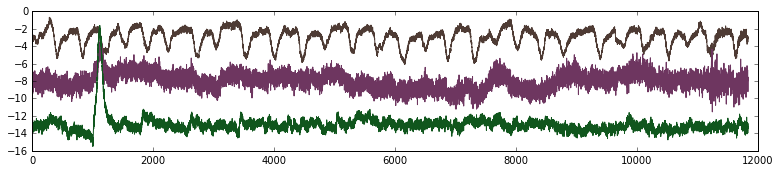

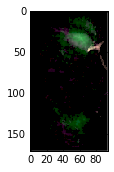

NO
PB
67
NO
PB
78
nodulus


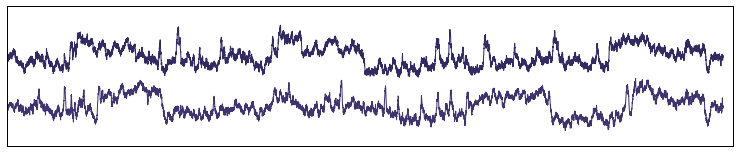

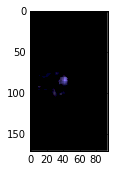

PB
ATL_L
69
PB
220
protocerebral bridge


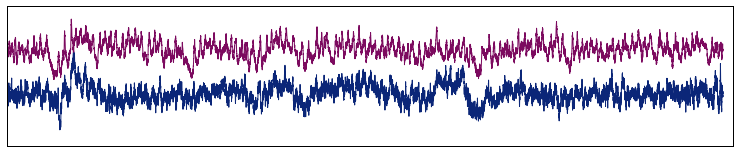

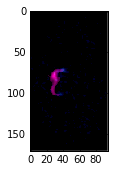

LH_R
29
LH_R
31
LH_R
33
LH_R
40
LH_R
AL_R
MB_CA_R
76
lateral horn


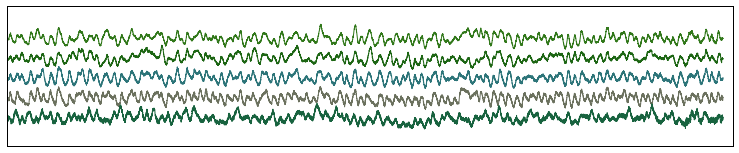

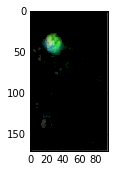

SAD
CAN_R
GNG
49
CAN_R
AMMC_L
FLA_L
IPS_L
60
CAN_R
FLA_R
CAN_L
FLA_L
101
SAD
CAN_R
GNG
AMMC_L
170
cantle


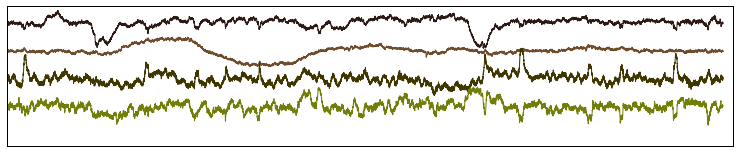

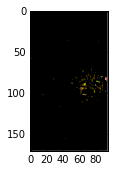

ATL_R
MB_CA_R
SCL_R
18
ATL_R
MB_CA_R
27
antler


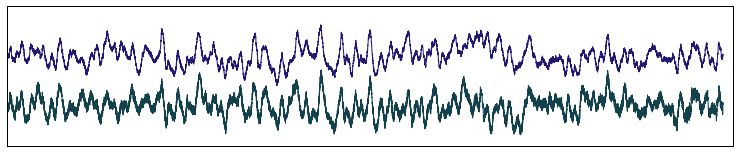

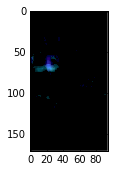

CRE_R
MB_VL_R
MB_ML_R
SMP_R
7
CRE_R
AL_R
25
crepine


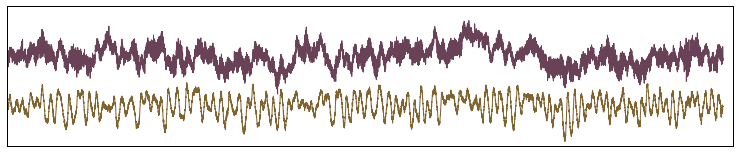

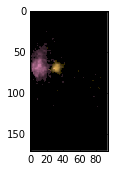

LAL_R
CRE_R
MB_PED_R
LAL_L
45
pedunculus of adult mushroom body


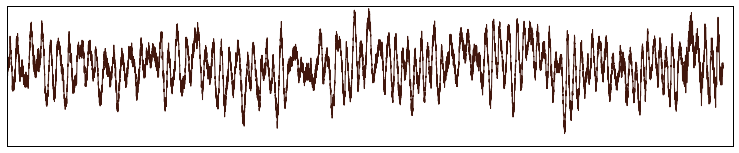

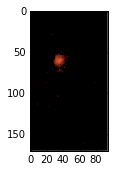

CRE_R
MB_VL_R
MB_ML_R
16
CRE_R
MB_PED_R
MB_ML_R
95
MB_ML_R
AL_R
CAN_L
MB_CA_L
194
medial lobe of adult mushroom body


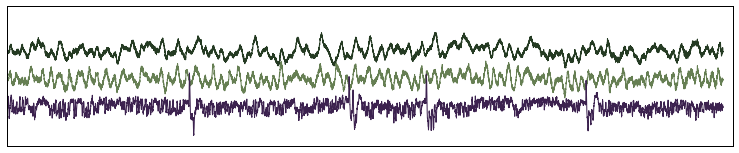

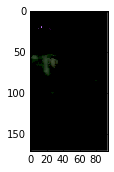

FLA_R
PRW
FLA_L
58
flange


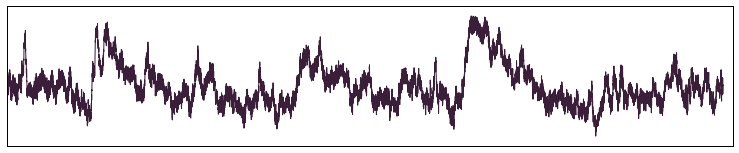

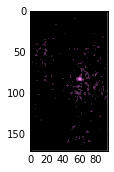

LO_R
LOP_R
1
LOP_R
ME_R
75
lobula plate


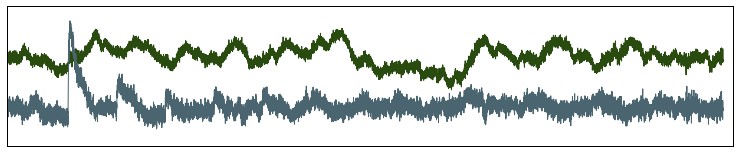

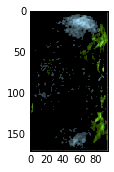

BU_R
EB
BU_L
MB_ML_L
70
NO
EB
FB
105
ellipsoid body


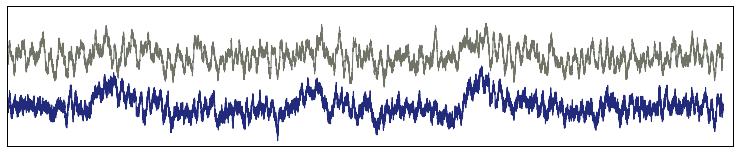

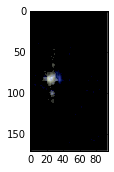

LAL_R
AL_R
AL_L
20
LAL_R
AL_R
43
LAL_R
AL_R
62
adult antennal lobe


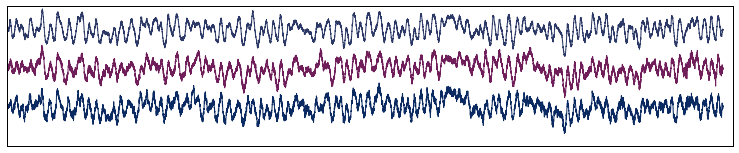

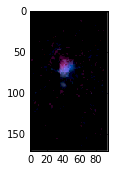

PB
ATL_R
FB
ATL_L
63
fan-shaped body


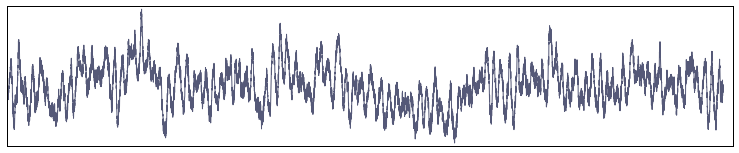

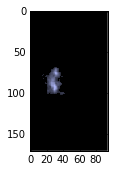

SMP_R
28
SMP_R
140
superior medial protocerebrum


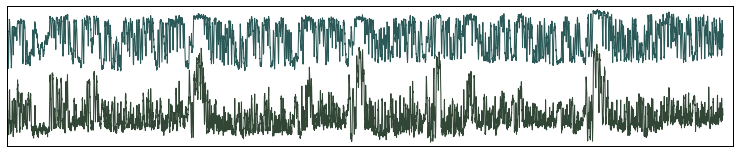

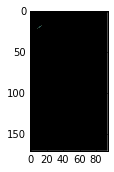

MB_CA_R
5
MB_CA_R
11
MB_CA_R
13
MB_CA_R
23
MB_CA_R
99
calyx of adult mushroom body


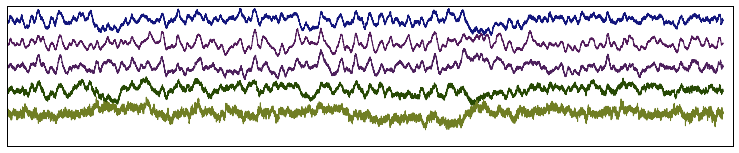

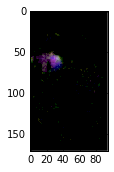

SPS_R
SPS_L
53
superior posterior slope


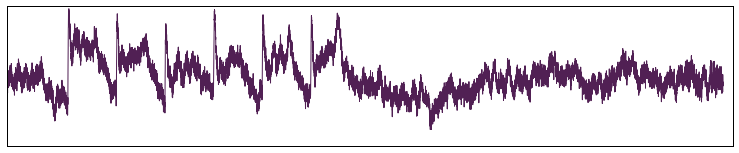

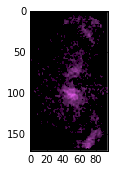

MB_VL_R
GNG
CAN_L
3
SAD
CAN_R
IPS_R
GNG
8
IPS_R
GNG
22
GNG
AMMC_L
AOTU_L
MB_CA_L
34
GNG
90
GNG
96
AL_R
GNG
152
GNG
171
SAD
VES_R
GNG
PRW
215
adult gnathal ganglion


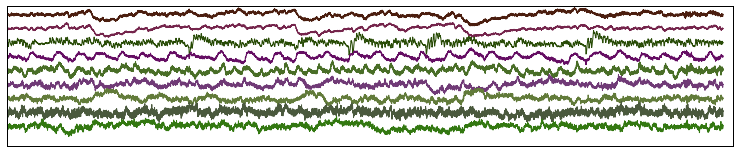

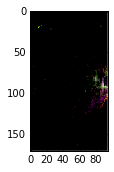

LO_L
68
LO_L
VES_L
AL_L
112
lobula


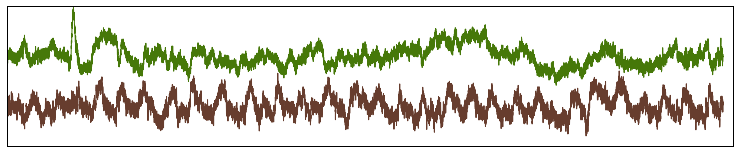

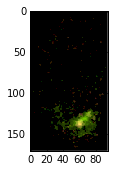

LH_L
56
LH_L
119
lateral horn


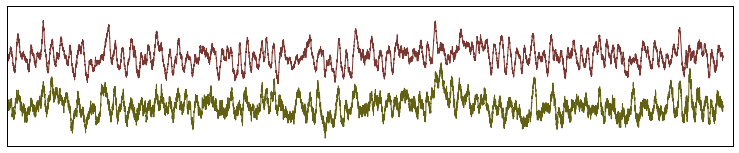

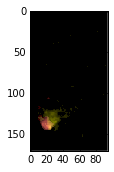

LAL_L
AL_L
26
BU_L
LAL_L
CRE_L
AL_L
32
LAL_L
51
lateral accessory lobe


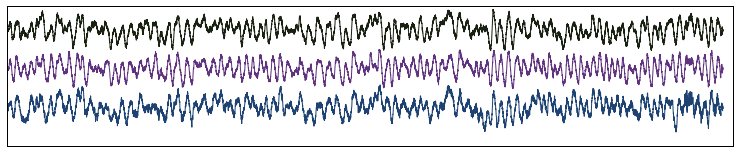

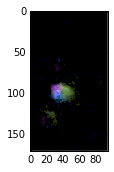

SAD
GNG
CAN_L
AMMC_L
47
CAN_L
IPS_L
52
SAD
GNG
CAN_L
FLA_L
92
CAN_R
CAN_L
93
CAN_L
FLA_L
IPS_L
115
CAN_L
116
FLA_R
GNG
CAN_L
121
SMP_R
GNG
CAN_L
136
CAN_R
CAN_L
VES_L
164
CAN_R
GNG
CAN_L
166
CAN_L
180
CAN_R
GNG
CAN_L
217
cantle


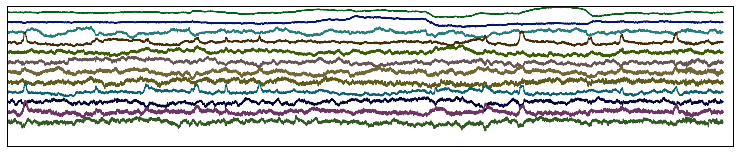

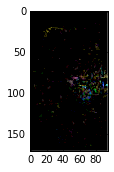

CAN_R
CAN_L
AMMC_L
54
CAN_R
GNG
AMMC_L
141
antennal mechanosensory and motor center


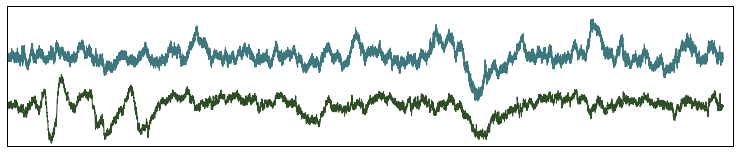

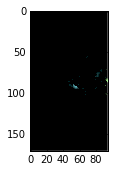

MB_VL_L
72
vertical lobe of adult mushroom body


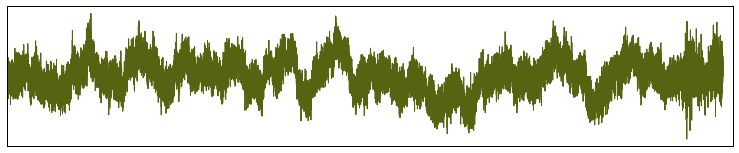

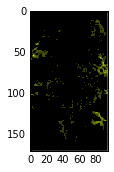

CRE_L
MB_VL_L
MB_ML_L
6
CRE_L
MB_ML_L
169
medial lobe of adult mushroom body


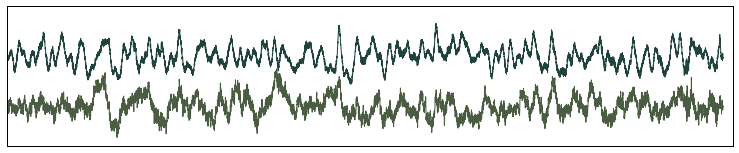

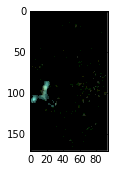

SAD
GNG
FLA_L
98
SMP_R
GNG
FLA_L
159
SAD
GNG
FLA_L
195
GNG
PRW
AMMC_L
FLA_L
222
flange


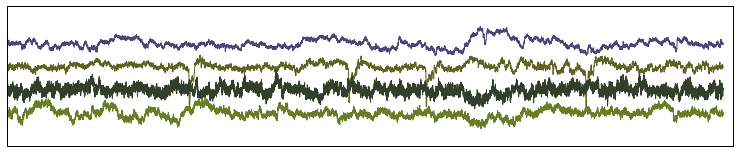

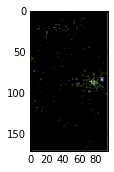

LOP_R
LOP_L
24
lobula plate


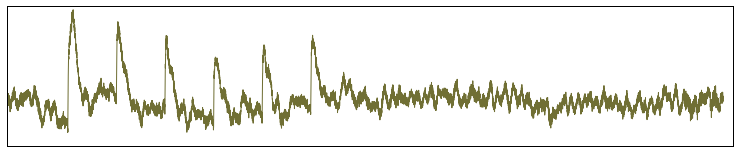

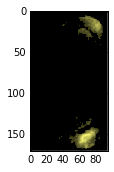

EB
AL_L
30
EB
AL_R
AL_L
36
AL_L
42
adult antennal lobe


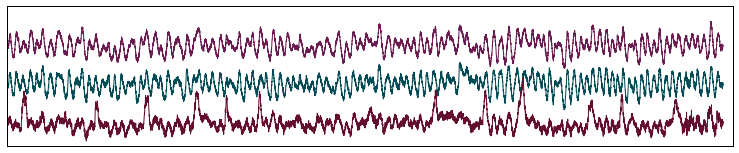

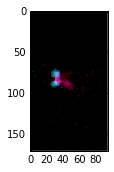

LO_L
CAN_L
ME_L
175
medulla


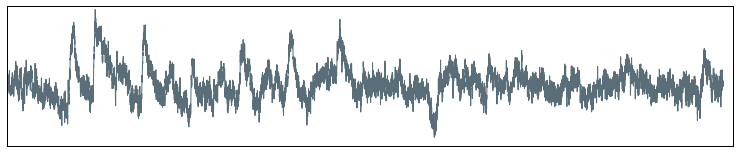

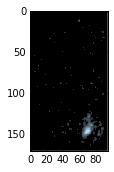

MB_ML_L
SMP_L
221
superior medial protocerebrum


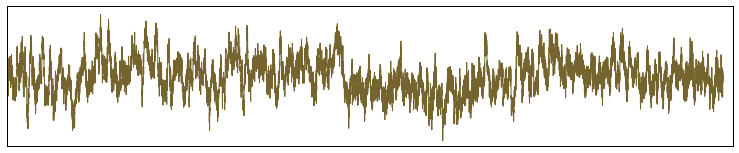

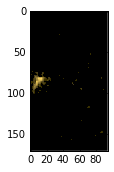

AVLP_R
AVLP_L
IVLP_L
89
anterior ventrolateral protocerebrum


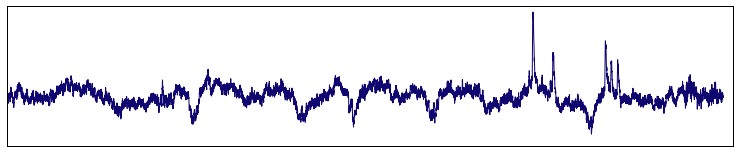

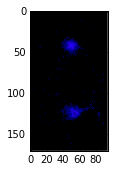

AOTU_L
205
anterior optic tubercle


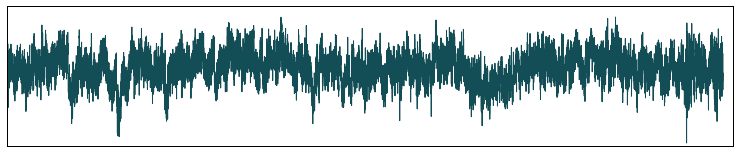

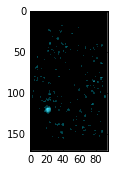

MB_PED_L
MB_CA_L
10
MB_CA_L
12
MB_PED_L
MB_CA_L
14
MB_CA_L
15
MB_CA_L
17
ICL_L
SIP_L
MB_CA_L
21
MB_CA_L
145
calyx of adult mushroom body


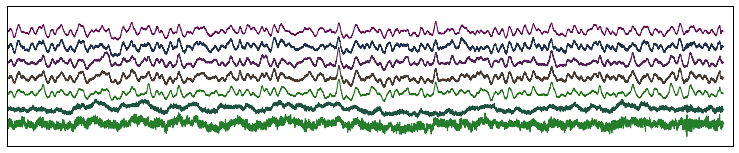

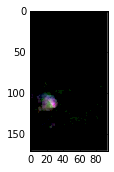

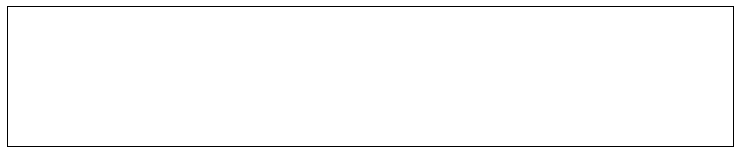

In [23]:
pylab.rcParams['figure.figsize'] = (13, 2.5)

h=5
tot=0
GoodICAnat=np.zeros(S[3])

for l in range(74):
    Final_maps=np.zeros((S[0],S[1],3))
    Fmap=np.zeros((S[0],S[1],3))
    C=np.zeros(3)

    n=0
    for i in range(len(CompMainName)):                    
        Dmmv=np.mean(data[:,:,:,i],2) 
        Dmmv[Dmmv<0.2*np.max(np.max(np.max(Dmmv)))]=0
        C=np.squeeze(np.random.rand(3,1))
        labeled, nrobject=ndimage.label(Dmmv>0)
        
        if CompMainName[i]==Names[l][0] and (sum(CompNameAdd[i,:])<5) and nrobject<200:
            n=n+1            
            
            for k in range(3):
                Fmap[:,:,k]=0.7*Dmmv*C[k]/np.max(C)
            Final_maps=Final_maps+Fmap
            #plt.plot(Time_fluoICA.T,(DT[:,i]/np.sqrt(np.var(DT[:,i]))-h*n+2),color=C/2)
            plt.plot((DT[:,i]/np.sqrt(np.var(DT[:,i]))-h*n+2),color=C/2)
            tot=tot+1
            GoodICAnat[i]=1
            #print(i)
            for j in range(86):
                if CompNameAdd[i,j]==1:                
                    print(Names[np.array(j)][0])
            print(i)
            
                    
    if n!=0:
        print(Names[l][1])

        plt.show()
        FM=Final_maps/np.max(np.max(Final_maps))
        FM[FM<0.1]=0
        plt.imshow(FM,interpolation='none')
        plt.show()
        frame1 = plt.gca()
        frame1.axes.get_xaxis().set_visible(False)
        frame1.axes.get_yaxis().set_visible(False)
        


##### Looked at the components maps and time series and remove all the components which are localized on the edge of the brain and with activity unlike GCaMP6 transients.


In [31]:
BadICs=[2,37,49,60,194,1,28,140,22,47,52,92,93,115,116,121,136,164,166,58,101,170,180,217,54,141,72,98,159,195,222,205]

In [32]:
for idx in BadICs:
    GoodICAnat[idx] = 0.0

# Reorder by larger sub-regions (~ presumed stimulus to motor)

In [33]:
LargerRegionsDic={'':'','AME_R':'OL','LO_R':'OL','NO':'CX','BU_R':'CX','PB':'CX','LH_R':'LH','LAL_R':'LX','SAD':'PENP'
               ,'CAN_R':'PENP','AMMC_R':'PENP','ICL_R':'INP','VES_R':'VMNP','IB_R':'INP','ATL_R':'INP','CRE_R':'INP'
               ,'MB_PED_R':'MB','MB_VL_R':'MB','MB_ML_R':'MB','FLA_R':'PENP','LOP_R':'OL','EB':'CX','AL_R':'AL',
                'ME_R':'OL','FB':'CX','SLP_R':'SNP','SIP_R':'SNP','SMP_R':'SNP','AVLP_R':'VLNP','PVLP_R':'VLNP',
                'IVLP_R':'VLNP','PLP_R':'VLNP','AOTU_R':'VLNP','GOR_R':'VMNP','MB_CA_R':'MB','SPS_R':'VMNP',
                'IPS_R':'VMNP','SCL_R':'INP','EPA_R':'VMNP','GNG':'GNG','PRW':'PENP','GA_R':'LX','AME_L':'OL'
                ,'LO_L':'OL','BU_L':'CX','LH_L':'LH','LAL_L':'LX','CAN_L':'PENP','AMMC_L':'PENP','ICL_L':'INP',
                'VES_L':'VMNP','IB_L':'INP','ATL_L':'INP','CRE_L':'INP','MB_PED_L':'MB','MB_VL_L':'MB',
                'MB_ML_L':'MB','FLA_L':'PENP','LOP_L':'OL','AL_L':'AL','ME_L':'OL','SLP_L':'SNP','SIP_L':'SNP',
                'SMP_L':'SNP','AVLP_L':'VLNP','PVLP_L':'VLNP','IVLP_L':'VLNP','PLP_L':'VLNP','AOTU_L':'VLNP',
                'GOR_L':'VMNP','MB_CA_L':'MB','SPS_L':'VMNP','IPS_L':'VMNP','SCL_L':'INP','EPA_L':'VMNP','GA_L':'LX'}

SmallRegionsSorted=['ME_L','ME_R','LO_R','LO_L','LOP_R','LOP_L','AME_R','AME_L',
                  'PLP_R','PLP_L','PVLP_R','PVLP_L','AVLP_R','AVLP_L','AOTU_R','AOTU_L','IVLP_R','IVLP_L',
                  'AL_R','AL_L',
                  'MB_CA_R','MB_CA_L','MB_PED_R','MB_PED_L','MB_VL_R','MB_VL_L','MB_ML_R','MB_ML_L',
                  'SMP_R','SMP_L','SIP_R','SLP_L','SLP_R','SIP_L',
                  'LH_R','LH_L',                  
                  'CRE_R','CRE_L','ICL_R','ICL_L','SCL_R','SCL_L','IB_R','IB_L','ATL_R','ATL_L',
                  'EB','PB','NO','FB',
                  'BU_R','BU_L','LAL_R','LAL_L','GA_R','GA_L',
                  'GOR_R','GOR_L','EPA_R','EPA_L','VES_R','VES_L','SPS_R','SPS_L','IPS_R','IPS_L',
                  'AMMC_R','AMMC_L','SAD','FLA_R','FLA_L','PRW','CAN_R','CAN_L',
                  'GNG','']

Tozip=range(len(SmallRegionsSorted))
SmallRegionsDic=dict(zip(SmallRegionsSorted,Tozip))

LargerRegion=[LargerRegionsDic[CompMainName[i]] for i in range(S[3])]

LargerRegionInd={ 'OL':1,'VLNP':2,'VMNP':3,'AL':4,'MB':5,'LH':6,'SNP':7,'CX':8,'LX':9,'INP':10,'PENP':11,'GNG':12,'':13}

LargerRegionI=np.array([LargerRegionInd[LargerRegion[i]] for i in range(S[3])])

SmallRegion=np.array([SmallRegionsDic[CompMainName[i]] for i in range(S[3])])

NewOrder=np.argsort(SmallRegion)

SmallRegion[NewOrder]

array([ 0,  0,  0,  0,  1,  2,  2,  2,  3,  3,  3,  3,  3,  4,  4,  5,  5,
       12, 12, 12, 12, 12, 12, 12, 13, 13, 13, 13, 13, 13, 13, 14, 14, 14,
       14, 15, 15, 15, 15, 15, 15, 15, 15, 15, 17, 17, 18, 18, 18, 18, 18,
       18, 18, 18, 19, 19, 19, 19, 19, 19, 19, 20, 20, 20, 20, 20, 20, 20,
       20, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 22, 22, 23, 23, 23,
       23, 25, 26, 26, 26, 27, 27, 27, 28, 28, 29, 32, 34, 34, 34, 34, 34,
       35, 35, 36, 36, 37, 44, 44, 44, 46, 46, 47, 47, 47, 48, 48, 49, 51,
       51, 53, 53, 53, 57, 61, 61, 62, 66, 66, 66, 66, 66, 66, 66, 67, 67,
       67, 67, 68, 68, 69, 69, 69, 69, 70, 70, 70, 70, 70, 70, 70, 70, 70,
       70, 70, 71, 71, 71, 71, 71, 71, 71, 72, 72, 72, 72, 72, 72, 72, 72,
       72, 72, 72, 72, 72, 72, 72, 72, 72, 72, 72, 73, 73, 73, 73, 73, 73,
       73, 73, 73, 73, 73, 73, 73, 73, 73, 73, 73, 73, 73, 73, 73, 73, 73,
       73, 73, 73, 73, 73, 73, 73, 73, 73, 73, 73, 73, 73, 73, 73, 73, 74,
       74, 74, 74, 74, 74

In [34]:
LargerRegionIndToName = {v: k for k, v in LargerRegionInd.iteritems()}

In [35]:
LargerRegionI

array([ 1,  1,  1, 12, 10,  5,  5, 10, 12,  5,  5,  5,  5,  5,  5,  5,  5,
        5, 10,  2,  4,  5, 12,  5,  1, 10,  9, 10,  7,  6,  4,  6,  9,  6,
       12,  5,  4,  1,  8,  5,  6, 11,  4,  4, 11,  5,  1, 11, 11, 11, 11,
        9, 11,  3, 11, 11,  6,  1, 11,  1, 11,  2,  4,  8, 12, 11,  5,  8,
        1,  8,  8, 11,  5,  2, 11,  1,  6, 11,  8,  2,  5, 11, 11, 11,  4,
       11, 12, 11, 11,  2, 12,  4, 11, 11,  4,  5, 12, 11, 11,  5, 11, 11,
        7, 11, 11,  8,  5, 11, 11,  2, 12, 11,  1, 11, 11, 11, 11,  2,  1,
        6, 12, 11, 11, 11, 11, 11,  3,  5, 11, 11, 11, 11,  2,  4,  5,  1,
       11, 11,  2,  5,  7, 11, 11, 11,  2,  5, 11, 11, 11,  2, 11, 11, 12,
        4, 10, 12,  2,  4,  2, 11, 11, 11,  2,  1, 11, 11, 11,  2, 11,  5,
       11, 12,  5,  5, 11,  1, 11, 11, 11, 11, 11,  2, 11, 11, 11, 12,  2,
       12, 11,  2,  2,  1, 11, 11,  5, 11, 11,  2, 11,  5, 11, 11, 11,  5,
       11,  2, 11, 11,  8, 11,  8, 11, 11, 11,  2, 12,  4, 11, 11,  2,  8,
        7, 11, 11,  2,  2

In [36]:
GoodICAnat

array([ 0.,  0.,  0.,  1.,  0.,  1.,  1.,  1.,  1.,  0.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  0.,  1.,  1.,  0.,  1.,  1.,  1.,
        1.,  1.,  0.,  1.,  1.,  1.,  1.,  1.,  1.,  0.,  1.,  0.,  0.,
        0.,  1.,  0.,  1.,  1.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  1.,
        0.,  1.,  0.,  0.,  1.,  0.,  0.,  1.,  0.,  0.,  1.,  1.,  0.,
        0.,  0.,  1.,  1.,  1.,  1.,  0.,  0.,  0.,  0.,  1.,  1.,  0.,
        1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  1.,
        0.,  0.,  0.,  0.,  1.,  1.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,
        0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,
        0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        1.,  0.,  1.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  0

OL
24
59
68
75
112
175


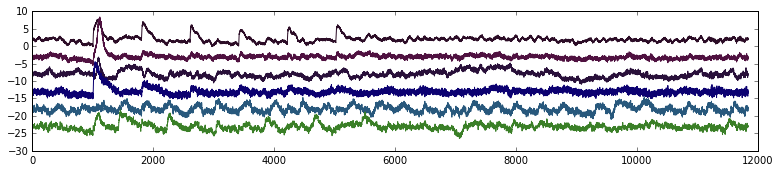

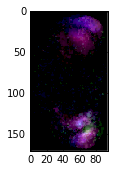

VLNP
89


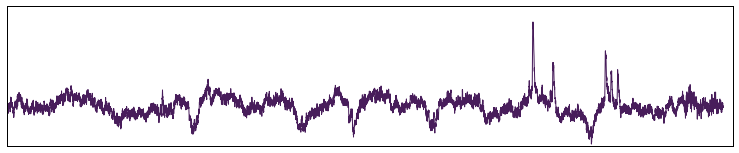

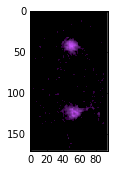

VMNP
53


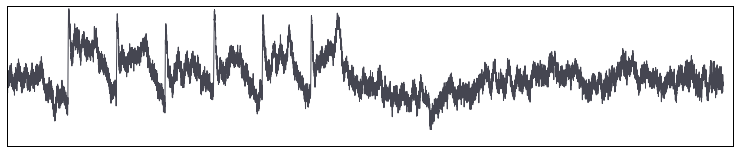

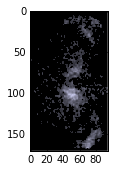

AL
20
30
36
42
43
62


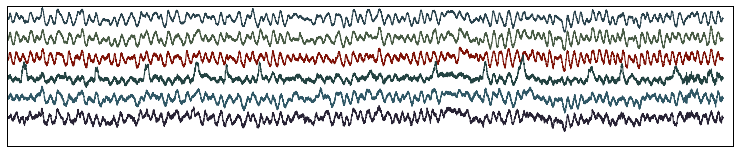

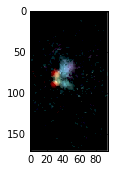

MB
5
6
10
11
12
13
14
15
16
17
21
23
45
95
99
145
169


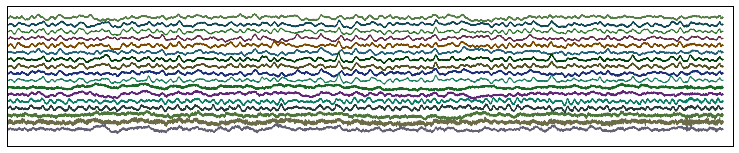

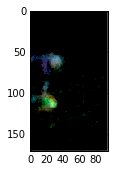

LH
29
31
33
40
56
76
119


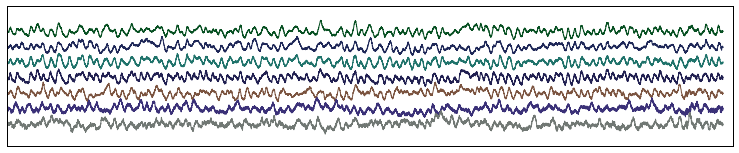

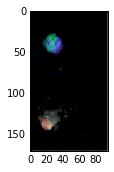

SNP
221


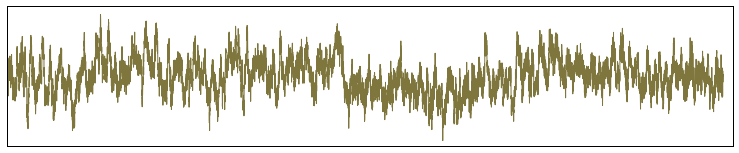

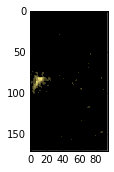

CX
63
67
69
70
78
105
220


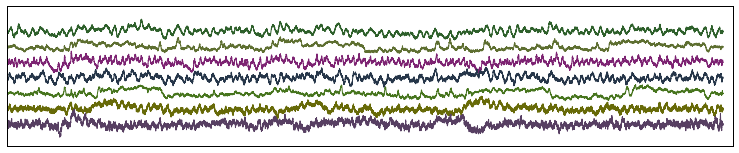

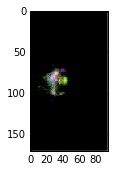

LX
26
32
51


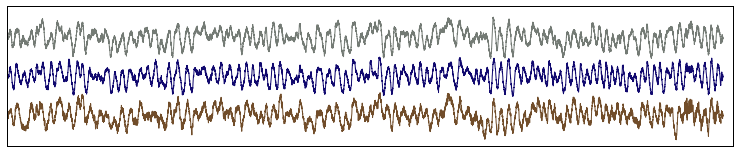

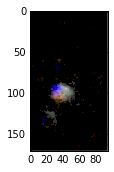

INP
7
18
25
27


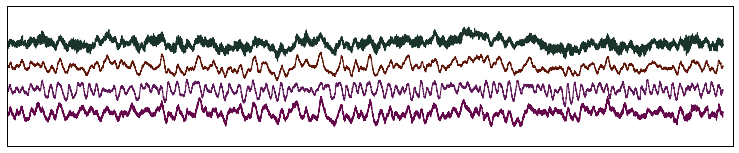

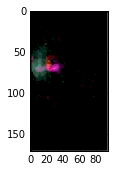

PENP
GNG
3
8
34
90
96
152
171
215


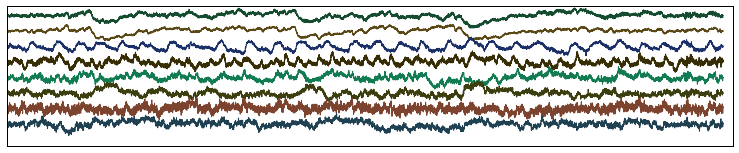

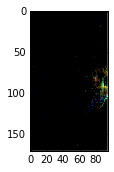

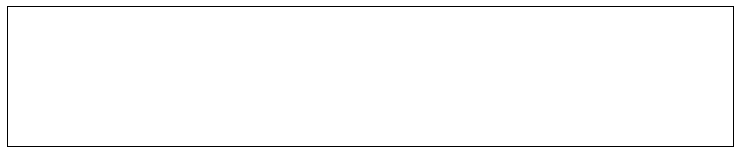

In [37]:
pylab.rcParams['figure.figsize'] = (13, 2.5)

h=5
tot=0
NumberInLargeRegion=np.zeros(13)

for l in range(1,13):
    print(LargerRegionIndToName[l])
    Final_maps=np.zeros((S[0],S[1],3))
    Fmap=np.zeros((S[0],S[1],3))
    C=np.zeros(3)

    n=0
    for i in range(len(CompMainName)):                    
        Dmmv=np.mean(data[:,:,:,i],2) 
        Dmmv[Dmmv<0.2*np.max(np.max(np.max(Dmmv)))]=0
        C=np.squeeze(np.random.rand(3,1))
        labeled, nrobject=ndimage.label(Dmmv>0)
        
        if LargerRegionI[i]==l:          
            if GoodICAnat[i]==1:
                for k in range(3):
                    Fmap[:,:,k]=0.7*Dmmv*C[k]/np.max(C)
                Final_maps=Final_maps+Fmap
                #plt.plot(Time_fluoICA.T,(DT[:,i]/np.sqrt(np.var(DT[:,i]))-h*n+2),color=C/2)
                plt.plot((DT[:,i]/np.sqrt(np.var(DT[:,i]))-h*n+2),color=C/2)
                tot=tot+1
                print(i)
                n=n+1 
                    
    if n!=0:

        plt.show()
        FM=Final_maps/np.max(np.max(Final_maps))
        FM[FM<0.1]=0
        plt.imshow(FM,interpolation='none')
        plt.show()
        frame1 = plt.gca()
        frame1.axes.get_xaxis().set_visible(False)
        frame1.axes.get_yaxis().set_visible(False)
        
    NumberInLargeRegion[l]=n

In [38]:
# Output number of component per region
np.savetxt('/'.join(filename.split('/')[:-1])+'/NumberInLargeRegions.txt',NumberInLargeRegion)